# Header
<h4>Calculating the Electron charge to mass ratio</h4>
Sean Tan, Justin Marin, Mihir Lad
<br>June 30th 2016
<br>



# Experimental Method
The method we used is similar to that used by J.J. Thompson, who was the first to make a direct measurement of the charge to mass ratio of the electron.

The first apparatus that we used included a Helmholtz coil that produced a uniform magnetic field between the two coils and held a discharge tube filled with helium gas and a cm scale for measuring the radius of the curvature of the electron path. 

The second apparatus contained the power supply that provides the current for the Helmholtz coils and the voltage for the electron source. 

As the electrons leave the gun with a known velocity, it will enter the discharge tube and curve relative to the magnetic field created by the Helmholtz coils. 

By measuring the radius of the curvature as a function of the magnetic field and the accelerating potential, you will be able to obtain a data set from which the ratio e/m can be determined.


The equation for the increase in kinetic engery from the accelerating potential of $V_{0}$ is

<br>
            
e$V_{0}$=m$v^{2}$/2
 
<br>

When the electron enters the discharge tube with a speed perpindicular to the magnetic field created by the coils, the force on the charge can be found using 

<br>
         
$\vec{F}$=e$\vec{v}$x$\vec{B}$

<br>
 
Because B and v are perpendicular, the cross product reduces to give a simpler relation of

<br>
           
F=evB=m$v^{2}$/R
           
<br>


Rearranging to isolate the $\frac{e}{m}$ ratio we get

<br>
           
$\frac{e}{m}$=$\frac{2V_{0}}{R^{2}B^{2}}$
            
<br>

By measuring for R for different combinations of $V_{0}$ and B we can determine the $\frac{e}{m}$ of the electron.


# Data
Keeping the current constant, we adjusted the voltage to create 5 distinct curvature diameters distances starting from 5 cm. At each increment of 1+/-0.1 cm, we recorded the voltage needed to achieve that distance from the electron emission source.


In [354]:
from IPython.display import HTML, display
import qexpy as q
import pandas as pd

data = [['Voltage (V)', 'Diameter (cm)', 'Current (A)'],
        [166,5,2.000],
        [226,6,2.000],
        [295,7,2.000],
        [382,8,2.000],
        [476,9,2.000]]

uncertainty =[[u'$\Delta$''V (Voltage)',u'$\Delta$''D (Diameter in cm)',u'$\Delta$''I (Current in Amps)'],
             [1,.1,0.001]]
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in uncertainty)
        )
 ))

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

$\Delta$V (Voltage),$\Delta$D (Diameter in cm),$\Delta$I (Current in Amps)
1,0.1,0.001


Voltage (V),Diameter (cm),Current (A)
166,5,2.0
226,6,2.0
295,7,2.0
382,8,2.0
476,9,2.0


# Result and Analysis
To calculate the propagation of the uncertainties from each value I decided to convert our list of data points with the ufloat() function from the uncertainties package.  

In [355]:
from uncertainties import ufloat
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

voltage = np.array([ufloat(166, 1), ufloat(226,1), ufloat(295,1), ufloat(382,1),ufloat(476,1)])
radius = np.array([ufloat(0.05,0.001), ufloat(0.06,0.001), ufloat(0.07,0.001), ufloat(0.08,0.001), ufloat(0.09,0.001)])/2
current = np.array([ufloat(2.001,0.001), ufloat(2.001,0.001), ufloat(2.001,0.001), ufloat(2.001,0.001), ufloat(2.001,0.001)])

To calculate the magnetic field created by the two Helmholtz Coils, we used the equation
    
$B={\mu}_{0}\bullet\frac{8\bullet I \bullet N}{\sqrt{125}\bullet R}$

With the given constants, we arrive at a simplified form of 

$B={7.99}\bullet {10^4}\bullet I$


In [356]:

bField = 7.99*10**(-4)*current

#Using the arrays for voltage, radius, and bField, we are able to calculate an array with the e/m ratio for each data point
ratio = ((2*voltage)/((radius**2)*(bField**2)))


#Converting ratio values to scientific notation
formatting_function = np.vectorize(lambda f: format(f, '6.3E'))
print ('e/m Ratio for each data point')
print (formatting_function(ratio))



e/m Ratio for each data point
['2.078E+11+/-0.084E+11' '1.965E+11+/-0.066E+11' '1.884E+11+/-0.054E+11'
 '1.868E+11+/-0.047E+11' '1.839E+11+/-0.041E+11']


In [357]:
#Creating lists of the nominal values for the data to plot on the graph 
nominalVoltage = []
nominalRadius = []
nominalBField = []
nominalRatio = []

for x in range(0, 5):
    nominalVoltage.append(voltage[x].nominal_value)
    nominalRadius.append(radius[x].nominal_value)
    nominalBField.append(bField[x].nominal_value)
    nominalRatio.append(ratio[x].nominal_value)

y = np.array(nominalRadius)
y = (1/(y)**2)

x= (np.array(nominalBField)**2)/(2*np.array(nominalVoltage))

ratio_array = np.array(nominalRatio, dtype=np.float32)
mean_ratio = ratio.mean()
std_ratio = ratio_array.std()
print("Mean is", mean_ratio)
print("Standard Deviation is", std_ratio)


Mean is (1.927+/-0.027)e+11
Standard Deviation is 8.63509e+09


The expected value for the ratio between charge and mass of an electron is 

$\frac{e}{m}\approx 1.759\bullet {10^{11}} \frac{C}{kg}$

We see that with this calculation, our observed mean value is within 2 standard deviation of the expected ratio.


Another method we used to calculate the e/m ratio is to rearrange the original equation into

$\frac{1}{R^2} = \frac{B^2}{2 V_{0}}\bullet (\frac{e}{m})$

then, plotting $\frac{1}{R^2}$ with $\frac{B^2}{2 V_{0}}$ to find the observed slope.

Because we know that the expected result will be a linear relationship between $\frac{1}{R^2}$ and $\frac{B^2}{2 V_{0}}$ with a slope of $\frac{e}{m}$, we can compare that to the slope from our observed data points.

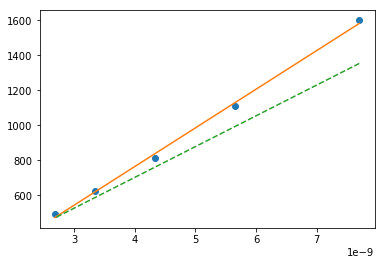

Observed e/m ratio 220770595905.0
Expected e/m ratio 175800000000.0
Observed y-intercept -117.983743924


Power_divergenceResult(statistic=66.752256471630133, pvalue=1.099483308560576e-13)

In [358]:

plt.plot(x, y, marker='o', linestyle = 'None')
slope, intercept = np.polyfit(x, y, 1)

observed_fit = [(slope) * i + intercept for i in x]
expected_fit = [(1.758*10**11) * i  for i in x]

plt.plot(x, observed_fit, '-')
plt.plot(x, expected_fit, '--')
expected_slope, expected_intercept = np.polyfit(x, expected_fit, 1)

plt.show()
print('Observed e/m ratio',slope)
print('Expected e/m ratio', expected_slope)

print('Observed y-intercept', intercept)

observed_values=scipy.array(observed_fit)
expected_values=scipy.array(expected_fit)

scipy.stats.chisquare(observed_values, f_exp=expected_values)


# Conclusion

We can conclude that our measument from taking the mean of the data points resulted in a more accurate calculation of the e/m ratio.The expected value for the ratio between the charge and the mass of the electron was 1.758820024 × 10e11 C ∙ kg−1. However, the average q/m that we measured was (1.927+/-0.027)e+11 C/kg. There were different components in our experiment that could have caused this discrepancy in our data but the two most realistic factors were the eye-measured diameter of the electron path and the power source that we were using. Because each diameter measurement was measured with our eyes, the human factor is a big contributor to the errors we may have made. The power source was also a large contributor because it powered the current through the coil, the voltage between the anodes, as well as the heater. With multiple apparatus relying on a single power source, any small uncertainty can compound into larger margin of error through uncertainty propagation. One of the reason why our linear plotting analysis may have been less accurate than the mean is because in theory, the radius could never reach 0 due to the y value being $\frac{1}{R^2}$. This means that the points may fit better on a exponential curve.